In [34]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [35]:
#https://data.world/annjackson/2019-superstore
df_store = pd.read_csv("Superstore_2019.csv")

In [36]:
df_store.describe()

,Discount,Number of Records,Postal Code,Profit,Quantity,Sales
count,9994.000000,9994.0,9983.000000,9994.000000,9994.000000,9994.000000
mean,0.156203,1.0,55245.233297,28.656896,3.789574,229.858001
std,0.206452,0.0,32038.715955,234.260108,2.225110,623.245101
min,0.000000,1.0,1040.000000,-6599.978000,1.000000,0.444000
25%,0.000000,1.0,23223.000000,1.728750,2.000000,17.280000
50%,0.200000,1.0,57103.000000,8.666500,3.000000,54.490000
75%,0.200000,1.0,90008.000000,29.364000,5.000000,209.940000
max,0.800000,1.0,99301.000000,8399.976000,14.000000,22638.480000


In [37]:
df_store.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Postal Code',
       'Manufacturer', 'Product Name', 'Profit', 'Quantity', 'Region', 'Sales',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category'],
      dtype='object')

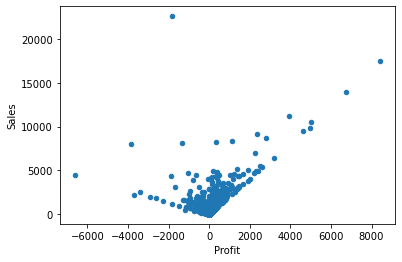

In [39]:
df_store.plot(y="Sales", x="Profit", kind="scatter")
plt.show()